# Trends in Nurse Attrition by Alyssa Crawford


## Data loading and preprocessing
Let's start with loading and checking for duplicates, and missing data. After loading, I will review the number of rows, columns, and data types.

In [1]:
#import pandas the data analysis library for python
import pandas as pd 

#upload excel file
eadf = pd.read_excel("Alyssa Crawford - Employee Attrition for Healthcare.xlsx")


print(eadf.head())

   EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0     1313919   41        No      Travel_Rarely       1102  Cardiology   
1     1200302   49        No  Travel_Frequently        279   Maternity   
2     1060315   37       Yes      Travel_Rarely       1373   Maternity   
3     1272912   33        No  Travel_Frequently       1392   Maternity   
4     1414939   27        No      Travel_Rarely        591   Maternity   

   DistanceFromHome  Education EducationField  EmployeeCount  ...  \
0                 1          2  Life Sciences              1  ...   
1                 8          1  Life Sciences              1  ...   
2                 2          2          Other              1  ...   
3                 3          4  Life Sciences              1  ...   
4                 2          1        Medical              1  ...   

   RelationshipSatisfaction StandardHours  Shift  TotalWorkingYears  \
0                         1            80      0                  8  

In [2]:
eadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

We have 1,676 rows and 34 columns. Nothing to indicate first or last date of hrie.

In [4]:
eadf.describe(include="all")

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676,1676,1676.000000,1676,1676.000000,1676.000000,1676,1676.0,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
unique,NaN,NaN,2,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,No,Travel_Rarely,NaN,Maternity,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1477,1184,NaN,796,NaN,NaN,697,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.456796e+06,36.866348,NaN,NaN,800.557876,NaN,9.221957,2.907518,NaN,1.0,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,NaN,NaN,401.594438,NaN,8.158118,1.025835,NaN,0.0,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,NaN,NaN,796.500000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000


The total number of rows is 1,676. 

## Check for duplicates
Each row in the data set presents a nurse and the column named 'EmployeeID' is a unique identifer for the visit. Let's check this field for duplicates, we should not have any duplicates in this column.

In [5]:
#duplicate method returns boolean list, named argument keep=False will mark all dups
eadf[eadf.duplicated(subset=["EmployeeID"], keep=False)]

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


Empty table indicates no duplicates found by Employee ID

## Check for missing values

In [6]:
print( eadf.isna().any() )

EmployeeID                  False
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
Shift                       False
TotalWorkingYears           False
TrainingTimesL

## Nurse Attrition 
Attrition is the metric of interest.
Yes label indicates they left the hospital. 
No label indicates they stayed.

In [7]:
eadf[['EmployeeID','Attrition']]

,EmployeeID,Attrition
0,1313919,No
1,1200302,No
2,1060315,Yes
3,1272912,No
4,1414939,No
...,...,...
1671,1117656,Yes
1672,1152327,No
1673,1812428,No
1674,1812429,No


In [8]:
eadf.groupby(["JobRole"]).agg({"Attrition": "size"}).reset_index()

,JobRole,Attrition
0,Admin,16
1,Administrative,115
2,Nurse,822
3,Other,534
4,Therapist,189


Something is not right with the "admin" and "administrative" role. Let's combine these. It's likely that "admin" is a data entry error.

In [9]:
eadf.loc[eadf['JobRole'] == "Admin","JobRole"] = "Administrative"

In [10]:
eadf.groupby(["JobRole"]).agg({"Attrition": "size"}).reset_index()

,JobRole,Attrition
0,Administrative,131
1,Nurse,822
2,Other,534
3,Therapist,189


Lets go ahead and remove the other job roles in the data set to review just the nurses who are the target for this anaylsis. 

In [11]:
jobsdf = eadf.groupby(["JobRole","Attrition"]).agg({"EmployeeID": "size"}).reset_index()

totjobsdf = eadf.groupby(["JobRole"]).agg({"EmployeeID": "size"}).reset_index()

jobsdf = jobsdf.merge(totjobsdf, on="JobRole", suffixes=('_count', '_total')) 

jobsdf["PercentAttrition"] = jobsdf["EmployeeID_count"] / jobsdf["EmployeeID_total"] *100

jobsdf

,JobRole,Attrition,EmployeeID_count,EmployeeID_total,PercentAttrition
0,Administrative,No,130,131,99.236641
1,Administrative,Yes,1,131,0.763359
2,Nurse,No,715,822,86.982968
3,Nurse,Yes,107,822,13.017032
4,Other,No,447,534,83.707865
5,Other,Yes,87,534,16.292135
6,Therapist,No,185,189,97.883598
7,Therapist,Yes,4,189,2.116402


Attrition              No        Yes
JobRole                             
Administrative  99.236641   0.763359
Nurse           86.982968  13.017032
Other           83.707865  16.292135
Therapist       97.883598   2.116402


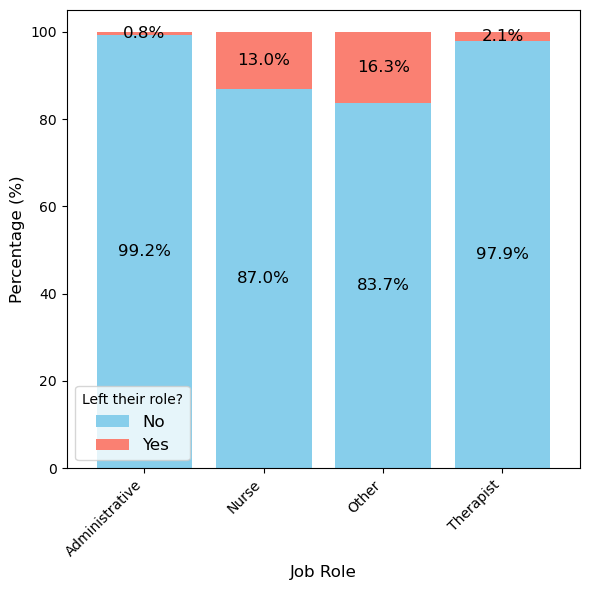

In [12]:
import matplotlib.pyplot as plt

pivot_df = jobsdf.pivot(index="JobRole", columns="Attrition", values="PercentAttrition").fillna(0)

# Plotting with percentage labels
fig, ax = plt.subplots(figsize=(6, 6))
bars = pivot_df.plot(kind="bar", stacked=True, ax=ax, color=["skyblue", "salmon"], width=0.8)
print(pivot_df)
# Adding percentage labels to each segment of the bars
# ax.containers is a collection of all the individual bar segments created in the bar chart.
for bar in ax.containers:
    labels = [f"{height:.1f}%" if height != 0 else "" for height in bar.datavalues]
    ax.bar_label(bar, labels=labels, label_type="center", fontsize=12, color="black")
    
# Customizing the plot
#plt.title("Percent Leaving by Job Role", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Job Role", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Left their role?", fontsize=12)
plt.tight_layout()
plt.show()

In [13]:
jobsdf = eadf.groupby(["JobRole","Department","Attrition"]).agg({"EmployeeID": "size"}).reset_index()

totjobsdf = eadf.groupby(["Department"]).agg({"EmployeeID": "size"}).reset_index()

jobsdf = jobsdf.merge(totjobsdf, on="Department", suffixes=('_count', '_total')) 

jobsdf["Percent"] = jobsdf["EmployeeID_count"] / jobsdf["EmployeeID_total"] *100

jobsdf = jobsdf.sort_values('Percent')

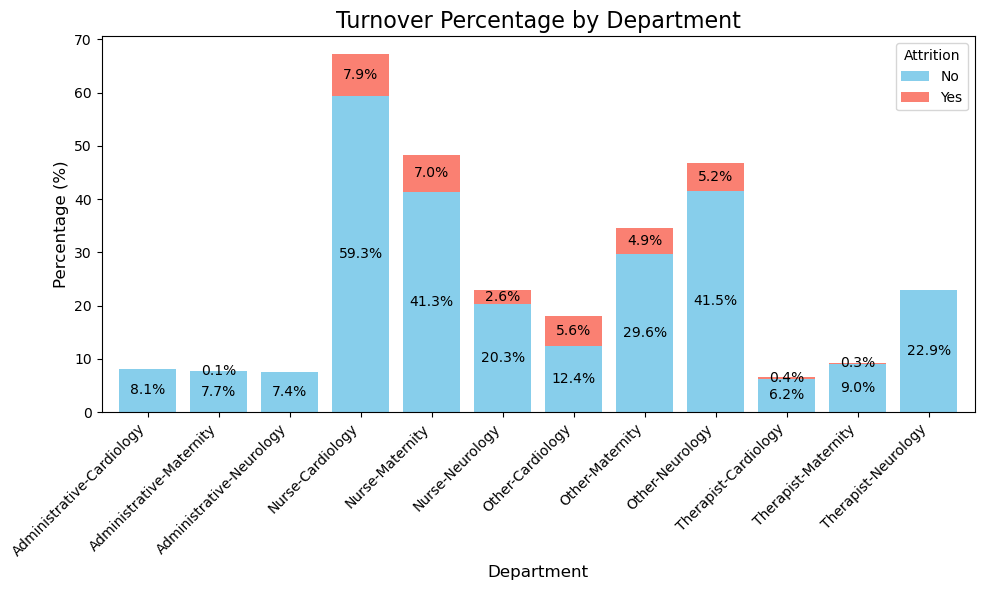

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


jobsdf['combined'] = jobsdf['JobRole'].astype(str) + '-' + jobsdf['Department'].astype(str)

pivot_df = jobsdf.pivot(index="combined", columns="AttritionA", values="Percent").fillna(0)

# Plotting with percentage labels
fig, ax = plt.subplots(figsize=(10, 6))
bars = pivot_df.plot(kind="bar", stacked=True, ax=ax, color=["skyblue", "salmon"], width=0.8)

# Adding percentage labels to each segment of the bars
# ax.containers is a collection of all the individual bar segments created in the bar chart.
for bar in ax.containers:
    labels = [f"{height:.1f}%" if height != 0 else "" for height in bar.datavalues]
    ax.bar_label(bar, labels=labels, label_type="center", fontsize=10, color="black")
   
# Customizing the plot
plt.title("Turnover Percentage by Department", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Department", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Attrition", fontsize=10)
plt.tight_layout()
plt.show()

Compared to all job roles, the "nurse" role and "other" role have the highest level of leaving 

In [15]:
nursedf = eadf[eadf["JobRole"] == "Nurse"]
len(nursedf)

822

The row total matches the summary table, we have approrpiately subsetted to the nurse job role.

In [16]:
dedf = nursedf.groupby(["Department","Attrition"]).agg({"EmployeeID": "size"}).reset_index()

tot = nursedf.groupby(["Department"]).agg({"EmployeeID": "size"}).reset_index()

dedf = dedf.merge(tot, on=["Department"], suffixes=('_count', '_total')) 

dedf["PercentAttrition"] = dedf["EmployeeID_count"] / dedf["EmployeeID_total"] *100

dedf


,Department,Attrition,EmployeeID_count,EmployeeID_total,PercentAttrition
0,Cardiology,No,315,357,88.235294
1,Cardiology,Yes,42,357,11.764706
2,Maternity,No,329,385,85.454545
3,Maternity,Yes,56,385,14.545455
4,Neurology,No,71,80,88.750000
5,Neurology,Yes,9,80,11.250000


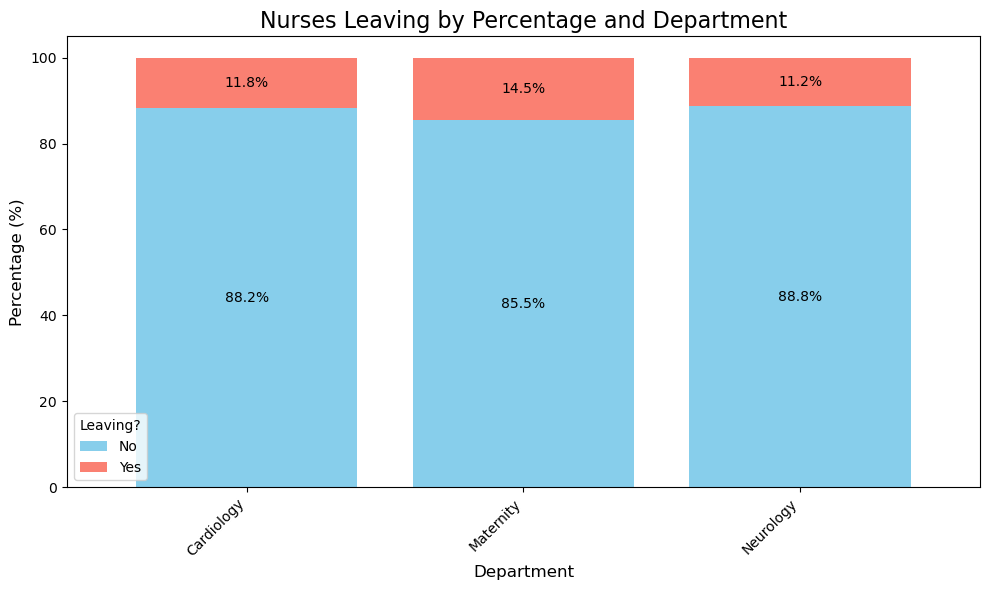

In [295]:
import matplotlib.pyplot as plt

pivot_df = dedf.pivot(index="Department", columns="Attrition", values="PercentAttrition").fillna(0)

# Plotting with percentage labels
fig, ax = plt.subplots(figsize=(10, 6))
bars = pivot_df.plot(kind="bar", stacked=True, ax=ax, color=["skyblue", "salmon"], width=0.8)

# Adding percentage labels to each segment of the bars
# ax.containers is a collection of all the individual bar segments created in the bar chart.
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.1f%%", label_type="center", fontsize=10, color="black")

    
# Customizing the plot
plt.title("Nurses Leaving by Percentage and Department", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Department", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Leaving?", fontsize=10)
plt.tight_layout()
plt.show()

In [31]:
otdf = nursedf.groupby(["Attrition","OverTime"]).agg({"EmployeeID": "size"}).reset_index()

tot = nursedf.groupby(["Attrition"]).agg({"EmployeeID": "size"}).reset_index()

otdf = otdf.merge(tot, on=["Attrition"], suffixes=('_count', '_total')) 

otdf["PercentOT"] = otdf["EmployeeID_count"] / otdf["EmployeeID_total"] *100

otdf


,Attrition,OverTime,EmployeeID_count,EmployeeID_total,PercentOT
0,No,No,564,715,78.881119
1,No,Yes,151,715,21.118881
2,Yes,No,34,107,31.775701
3,Yes,Yes,73,107,68.224299


OverTime          No        Yes
Attrition                      
Stayed     78.881119  21.118881
Quit       31.775701  68.224299


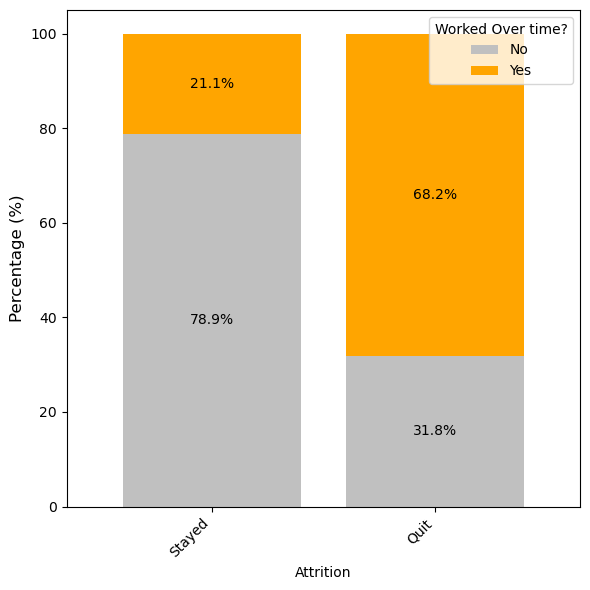

In [37]:
import matplotlib.pyplot as plt

pivot_df = otdf.pivot(index="Attrition", columns="OverTime", values="PercentOT").fillna(0)

pivot_df.rename(index={"No": "Stayed", "Yes": "Quit"}, inplace=True)

print(pivot_df)


# Plotting with percentage labels
fig, ax = plt.subplots(figsize=(6, 6))
bars = pivot_df.plot(kind="bar", stacked=True, ax=ax, color=["silver", "orange"], width=0.8)

# Adding percentage labels to each segment of the bars
# ax.containers is a collection of all the individual bar segments created in the bar chart.
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.1f%%", label_type="center", fontsize=10, color="black")

    
# Customizing the plot
#plt.title("Nurse Over Time Percentage by Department", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=12)
#plt.xlabel("Department", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Worked Over time?", fontsize=10)
plt.tight_layout()
plt.show()

In [358]:
otdf = nursedf.groupby(["OverTime","Shift"]).agg({"EmployeeID": "size"}).reset_index()

tot = nursedf.groupby(["Shift"]).agg({"EmployeeID": "size"}).reset_index()

otdf = otdf.merge(tot, on="Shift", suffixes=('_count', '_total')) 

otdf["PercentAttrition"] = otdf["EmployeeID_count"] / otdf["EmployeeID_total"] *100

otdf

,OverTime,Shift,EmployeeID_count,EmployeeID_total,PercentAttrition
0,No,0,246,337,72.997033
1,Yes,0,91,337,27.002967
2,No,1,244,340,71.764706
3,Yes,1,96,340,28.235294
4,No,2,69,90,76.666667
5,Yes,2,21,90,23.333333
6,No,3,39,55,70.909091
7,Yes,3,16,55,29.090909


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
N = 3
ind = np.arange(N)  
width = 0.25
  
xvals = [8, 9, 2] 
bar1 = plt.bar(ind, xvals, width, color = 'r') 
  
yvals = [10, 20, 30] 
bar2 = plt.bar(ind+width, yvals, width, color='g') 
  
zvals = [11, 12, 13] 
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b') 
  
plt.xlabel("Dates") 
plt.ylabel('Scores') 
plt.title("Players Score") 
  
plt.xticks(ind+width,['2021Feb01', '2021Feb02', '2021Feb03']) 
plt.legend( (bar1, bar2, bar3), ('Player1', 'Player2', 'Player3') ) 
plt.show() 

OverTime         No        Yes
Shift                         
0         72.997033  27.002967
1         71.764706  28.235294
2         76.666667  23.333333
3         70.909091  29.090909


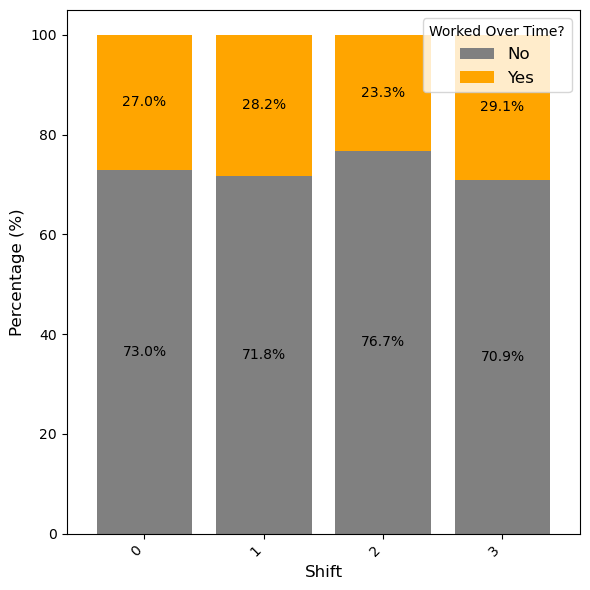

In [369]:
import matplotlib.pyplot as plt


pivot_df = otdf.pivot(index="Shift", columns="OverTime", values="PercentAttrition").fillna(0)
print(pivot_df)
# Plotting with percentage labels
fig, ax = plt.subplots(figsize=(6, 6))
bars = pivot_df.plot(kind="bar", stacked=True, ax=ax, color=["grey", "Orange"], width=0.8)

# Adding percentage labels to each segment of the bars
# ax.containers is a collection of all the individual bar segments created in the bar chart.
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.1f%%", label_type="center", fontsize=10, color="black")

    
# Customizing the plot
#plt.title("Nurses Leaving by Percentage and Department", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Shift", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Worked Over Time?", fontsize=12)
plt.tight_layout()
plt.show()

# Trend over years in current role

In [211]:
nursedf.groupby(["Attrition"]).agg({"YearsInCurrentRole": "mean"}).reset_index()

,Attrition,YearsInCurrentRole
0,No,4.468531
1,Yes,2.355140


In [215]:
ycomat = nursedf.groupby(["Attrition","YearsInCurrentRole"]).agg({"EmployeeID": "size"}).reset_index()
ycomat

,Attrition,YearsInCurrentRole,EmployeeID
0,No,0,99
1,No,1,22
2,No,2,172
3,No,3,72
4,No,4,53
5,No,5,19
6,No,6,13
7,No,7,130
8,No,8,52
9,No,9,33


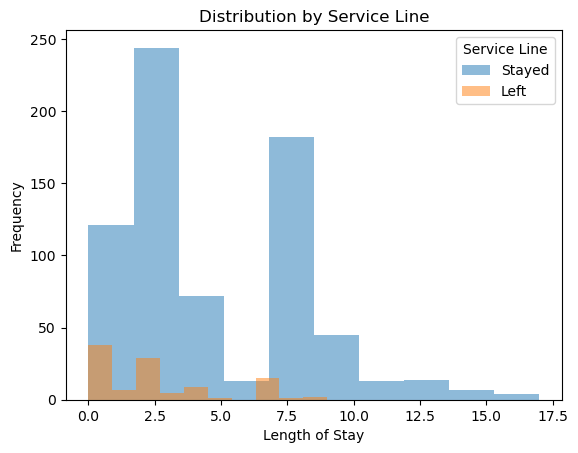

In [362]:
import matplotlib.pyplot as plt

#define points values by group
A = nursedf.loc[nursedf['Attrition'] == 'No', 'YearsInCurrentRole']
B = nursedf.loc[nursedf['Attrition'] == 'Yes', 'YearsInCurrentRole']

#add three histograms to one plotc
plt.hist(A, alpha=0.5, label='Stayed')
plt.hist(B, alpha=0.5, label='Left')

#add plot title and axis labels
plt.title('Distribution by Service Line')
plt.xlabel('Length of Stay')
plt.ylabel('Frequency')

#add legend
plt.legend(title='Service Line')

#display plot
plt.show()

In [354]:
new = nursedf[nursedf['YearsInCurrentRole']==0]
newagg = new.groupby(["Attrition","OverTime","Shift"]).agg({"EmployeeID": "size"}).reset_index() 
newagg["Percent"] = newagg["EmployeeID"]/ 38
newagg

,Attrition,OverTime,Shift,EmployeeID,Percent
0,No,No,0,26,0.684211
1,No,No,1,35,0.921053
2,No,No,2,14,0.368421
3,No,No,3,2,0.052632
4,No,Yes,0,6,0.157895
5,No,Yes,1,9,0.236842
6,No,Yes,2,3,0.078947
7,No,Yes,3,4,0.105263
8,Yes,No,0,12,0.315789
9,Yes,No,1,1,0.026316


In [174]:
import numpy as np

#calculate the correlation between the two arrays
np.corrcoef(nursedf['YearsAtCompany'],nursedf['YearsInCurrentRole']) #0.77
np.corrcoef(nursedf['YearsAtCompany'],nursedf['TotalWorkingYears']) #0.635
np.corrcoef(nursedf['NumCompaniesWorked'],nursedf['YearsInCurrentRole']) # -0.17

array([[ 1.        , -0.17382929],
       [-0.17382929,  1.        ]])

In [192]:
new = nursedf[nursedf['YearsInCurrentRole']==0]
nursedf.groupby(["Attrition"]).agg({"NumCompaniesWorked": "mean"}).reset_index()

,Attrition,NumCompaniesWorked
0,No,2.604196
1,Yes,3.028037


# Factors with Employee Rating

In [161]:
esat = nursedf.groupby(["Attrition","EnvironmentSatisfaction"]).agg({"EmployeeID": "size"}).reset_index()
esat

,Attrition,EnvironmentSatisfaction,EmployeeID
0,No,1,126
1,No,2,142
2,No,3,222
3,No,4,225
4,Yes,1,42
5,Yes,2,17
6,Yes,3,25
7,Yes,4,23


In [162]:
jsat = nursedf.groupby(["Attrition","JobSatisfaction"]).agg({"EmployeeID": "size"}).reset_index()
jsat

,Attrition,JobSatisfaction,EmployeeID
0,No,1,141
1,No,2,117
2,No,3,207
3,No,4,250
4,Yes,1,30
5,Yes,2,18
6,Yes,3,33
7,Yes,4,26


In [194]:
rsat = nursedf.groupby(["Attrition","RelationshipSatisfaction"]).agg({"EmployeeID": "size"}).reset_index()
rsat

,Attrition,RelationshipSatisfaction,EmployeeID
0,No,1,146
1,No,2,134
2,No,3,227
3,No,4,208
4,Yes,1,17
5,Yes,2,21
6,Yes,3,42
7,Yes,4,27


In [160]:
import numpy as np
#calculate the correlation between the two arrays  
np.corrcoef(esat["EmployeeID"], jsat["EmployeeID"])

array([[1.        , 0.98319293],
       [0.98319293, 1.        ]])

Highly correlated at 0.983 between job satisification and enviroment satisification.

In [57]:
newdf = nursedf.groupby(["Attrition","EnvironmentSatisfaction","OverTime"]).agg({"EmployeeID": "size"}).reset_index()

tot = nursedf.groupby(["Attrition"]).agg({"EmployeeID": "size"}).reset_index()

newdf = newdf.merge(tot, on=["Attrition"], suffixes=('_count', '_total')) 

newdf["Percent"] = newdf["EmployeeID_count"] / newdf["EmployeeID_total"] *100

newdf


,Attrition,EnvironmentSatisfaction,OverTime,EmployeeID_count,EmployeeID_total,Percent
0,No,1,No,111,715,15.524476
1,No,1,Yes,15,715,2.097902
2,No,2,No,119,715,16.643357
3,No,2,Yes,23,715,3.216783
4,No,3,No,172,715,24.055944
5,No,3,Yes,50,715,6.993007
6,No,4,No,162,715,22.657343
7,No,4,Yes,63,715,8.811189
8,Yes,1,No,21,107,19.626168
9,Yes,1,Yes,21,107,19.626168


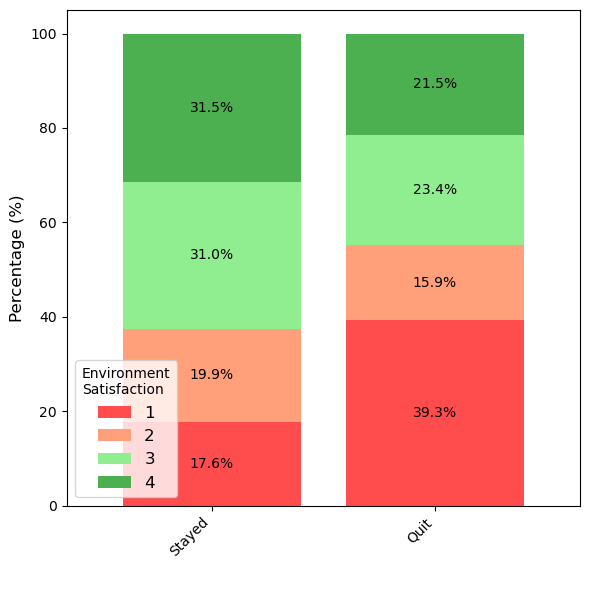

In [56]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


pivot_df = newdf.pivot(index="Attrition", columns="EnvironmentSatisfaction", values="Percent").fillna(0)
pivot_df.rename(index={"No": "Stayed", "Yes": "Quit"}, inplace=True)

# Plotting with percentage labels
fig, ax = plt.subplots(figsize=(6, 6))
bars = pivot_df.plot(kind="bar", stacked=True, ax=ax, color=["#FF4D4D", "#FFA07A", "#90EE90", "#4CAF50"], width=0.8)

# Adding percentage labels to each segment of the bars
# ax.containers is a collection of all the individual bar segments created in the bar chart.
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.1f%%", label_type="center", fontsize=10, color="black")

    
# Customizing the plot
# plt.title("Nurses Leaving by Percentage and Department", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower left", fontsize=12, title="Environment\nSatisfaction")
plt.tight_layout()
plt.show()

In [388]:
newdf = nursedf.groupby(["Attrition","JobSatisfaction"]).agg({"EmployeeID": "size"}).reset_index()

tot = nursedf.groupby(["JobSatisfaction"]).agg({"EmployeeID": "size"}).reset_index()

newdf = newdf.merge(tot, on=["JobSatisfaction"], suffixes=('_count', '_total')) 

newdf["Percent"] = newdf["EmployeeID_count"] / newdf["EmployeeID_total"] *100

newdf

,Attrition,JobSatisfaction,EmployeeID_count,EmployeeID_total,Percent
0,No,1,141,171,82.456140
1,Yes,1,30,171,17.543860
2,No,2,117,135,86.666667
3,Yes,2,18,135,13.333333
4,No,3,207,240,86.250000
5,Yes,3,33,240,13.750000
6,No,4,250,276,90.579710
7,Yes,4,26,276,9.420290


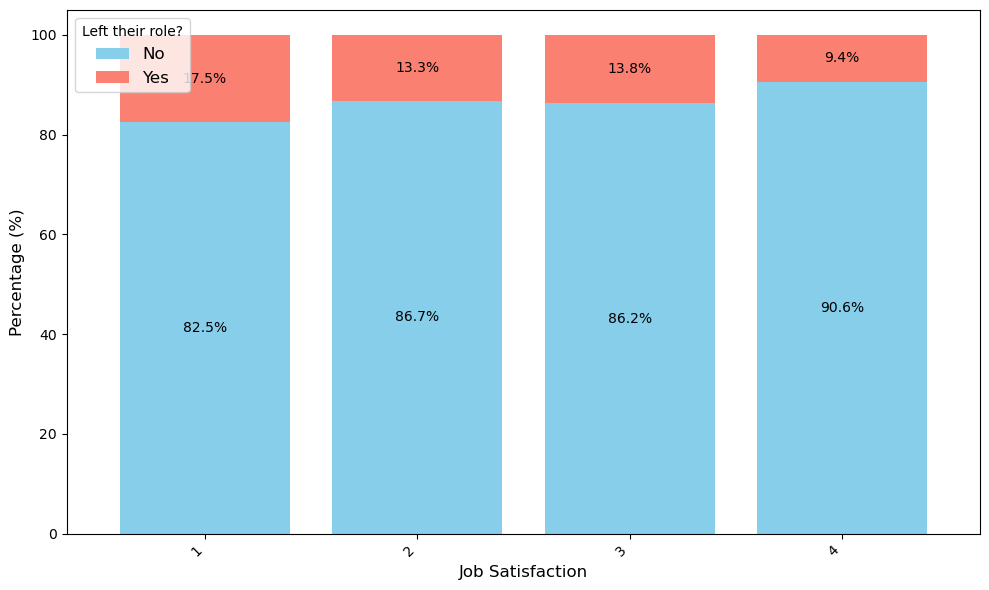

In [389]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


pivot_df = newdf.pivot(index="JobSatisfaction", columns="Attrition", values="Percent").fillna(0)

# Plotting with percentage labels
fig, ax = plt.subplots(figsize=(10, 6))
bars = pivot_df.plot(kind="bar", stacked=True, ax=ax, color=["skyblue", "salmon"], width=0.8)

# Adding percentage labels to each segment of the bars
# ax.containers is a collection of all the individual bar segments created in the bar chart.
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.1f%%", label_type="center", fontsize=10, color="black")

    
# Customizing the plot
# plt.title("Nurses Leaving by Percentage and Department", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Job Satisfaction", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Left their role?", fontsize=12)
plt.tight_layout()
plt.show()

# Appendix

### Not useful

In [101]:
nursedf.groupby(["Attrition"]).agg({"Age": "median"}).reset_index()

,Attrition,Age
0,No,36.0
1,Yes,31.0


In [93]:
nursedf.groupby(["Attrition"]).agg({"TotalWorkingYears": "mean"}).reset_index()

,Attrition,TotalWorkingYears
0,No,10.669930
1,Yes,7.205607


In [100]:
nursedf.groupby(["Attrition"]).agg({"DailyRate": "mean"}).reset_index()

,Attrition,DailyRate
0,No,811.173427
1,Yes,775.252336


In [144]:
nursedf.groupby(["Attrition","Department"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,Department,EmployeeID
0,No,Cardiology,315
1,No,Maternity,329
2,No,Neurology,71
3,Yes,Cardiology,42
4,Yes,Maternity,56
5,Yes,Neurology,9


In [99]:
nursedf.groupby(["Attrition","BusinessTravel"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,BusinessTravel,EmployeeID
0,No,Non-Travel,85
1,No,Travel_Frequently,137
2,No,Travel_Rarely,493
3,Yes,Non-Travel,8
4,Yes,Travel_Frequently,25
5,Yes,Travel_Rarely,74


In [87]:
nursedf.groupby(["Attrition","JobLevel"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,JobLevel,EmployeeID
0,No,1,201
1,No,2,371
2,No,3,121
3,No,4,22
4,Yes,1,59
5,Yes,2,32
6,Yes,3,13
7,Yes,4,3


In [113]:
nursedf.groupby(["Attrition"]).agg({"DistanceFromHome": "median"}).reset_index()

,Attrition,DistanceFromHome
0,No,7.0
1,Yes,9.0


In [102]:
nursedf.groupby(["Attrition","Education"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,Education,EmployeeID
0,No,1,78
1,No,2,142
2,No,3,270
3,No,4,200
4,No,5,25
5,Yes,1,10
6,Yes,2,21
7,Yes,3,50
8,Yes,4,26


In [103]:
nursedf.groupby(["Attrition","EducationField"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,EducationField,EmployeeID
0,No,Life Sciences,287
1,No,Marketing,119
2,No,Medical,213
3,No,Other,44
4,No,Technical Degree,52
5,Yes,Life Sciences,51
6,Yes,Marketing,18
7,Yes,Medical,25
8,Yes,Other,4
9,Yes,Technical Degree,9


In [104]:
nursedf.groupby(["Attrition"]).agg({"EmployeeCount": "mean"}).reset_index()

,Attrition,EmployeeCount
0,No,1.0
1,Yes,1.0


In [105]:
nursedf.groupby(["Attrition","Gender"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,Gender,EmployeeID
0,No,Female,270
1,No,Male,445
2,Yes,Female,42
3,Yes,Male,65


In [107]:
nursedf.groupby(["Attrition"]).agg({"HourlyRate": "mean"}).reset_index()

,Attrition,HourlyRate
0,No,66.029371
1,Yes,63.299065


In [108]:
nursedf.groupby(["Attrition"]).agg({"JobInvolvement": "mean"}).reset_index()


,Attrition,JobInvolvement
0,No,2.752448
1,Yes,2.392523


In [111]:
nursedf.groupby(["Attrition","JobLevel"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,JobLevel,EmployeeID
0,No,1,201
1,No,2,371
2,No,3,121
3,No,4,22
4,Yes,1,59
5,Yes,2,32
6,Yes,3,13
7,Yes,4,3


In [112]:
nursedf.groupby(["Attrition","JobSatisfaction"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,JobSatisfaction,EmployeeID
0,No,1,141
1,No,2,117
2,No,3,207
3,No,4,250
4,Yes,1,30
5,Yes,2,18
6,Yes,3,33
7,Yes,4,26


In [164]:
nursedf.groupby(["Attrition","MaritalStatus"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,MaritalStatus,EmployeeID
0,No,Divorced,169
1,No,Married,344
2,No,Single,202
3,Yes,Divorced,12
4,Yes,Married,34
5,Yes,Single,61


In [118]:
nursedf.groupby(["Attrition"]).agg({"MonthlyIncome": "mean"}).reset_index()

,Attrition,MonthlyIncome
0,No,5685.593007
1,Yes,4556.205607


In [119]:
nursedf.groupby(["Attrition"]).agg({"MonthlyRate": "mean"}).reset_index()

,Attrition,MonthlyRate
0,No,14183.779021
1,Yes,15085.065421


In [117]:
nursedf.groupby(["Attrition","NumCompaniesWorked"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,NumCompaniesWorked,EmployeeID
0,No,0,106
1,No,1,251
2,No,2,69
3,No,3,77
4,No,4,76
5,No,5,30
6,No,6,22
7,No,7,37
8,No,8,26
9,No,9,21


Small sizes for attrition

In [120]:
nursedf.groupby(["Attrition","Over18"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,Over18,EmployeeID
0,No,Y,715
1,Yes,Y,107


In [121]:
nursedf.groupby(["Attrition","PercentSalaryHike"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,PercentSalaryHike,EmployeeID
0,No,11,100
1,No,12,110
2,No,13,100
3,No,14,107
4,No,15,48
5,No,16,34
6,No,17,41
7,No,18,42
8,No,19,38
9,No,20,30


In [122]:
nursedf.groupby(["Attrition","PerformanceRating"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,PerformanceRating,EmployeeID
0,No,3,620
1,No,4,95
2,Yes,3,87
3,Yes,4,20


In [123]:
nursedf.groupby(["Attrition","RelationshipSatisfaction"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,RelationshipSatisfaction,EmployeeID
0,No,1,146
1,No,2,134
2,No,3,227
3,No,4,208
4,Yes,1,17
5,Yes,2,21
6,Yes,3,42
7,Yes,4,27


In [124]:
nursedf.groupby(["Attrition","StandardHours"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,StandardHours,EmployeeID
0,No,80,715
1,Yes,80,107


In [125]:
nursedf.groupby(["Attrition","Shift"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,Shift,EmployeeID
0,No,0,262
1,No,1,317
2,No,2,85
3,No,3,51
4,Yes,0,75
5,Yes,1,23
6,Yes,2,5
7,Yes,3,4


In [135]:
nursedf.groupby(["Attrition"]).agg({"TotalWorkingYears": "mean"}).reset_index()

,Attrition,TotalWorkingYears
0,No,10.669930
1,Yes,7.205607


In [126]:
nursedf.groupby(["Attrition","TotalWorkingYears"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,TotalWorkingYears,EmployeeID
0,No,0,2
1,No,1,21
2,No,2,7
3,No,3,10
4,No,4,34
5,No,5,40
6,No,6,61
7,No,7,39
8,No,8,66
9,No,9,59


In [127]:
nursedf.groupby(["Attrition","TrainingTimesLastYear"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,TrainingTimesLastYear,EmployeeID
0,No,0,19
1,No,1,34
2,No,2,246
3,No,3,249
4,No,4,64
5,No,5,66
6,No,6,37
7,Yes,0,7
8,Yes,1,4
9,Yes,2,50


In [128]:
nursedf.groupby(["Attrition","WorkLifeBalance"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,WorkLifeBalance,EmployeeID
0,No,1,28
1,No,2,154
2,No,3,459
3,No,4,74
4,Yes,1,20
5,Yes,2,32
6,Yes,3,48
7,Yes,4,7


In [137]:
nursedf.groupby(["Attrition"]).agg({"YearsAtCompany": "mean"}).reset_index()

,Attrition,YearsAtCompany
0,No,7.062937
1,Yes,3.822430


In [129]:
nursedf.groupby(["Attrition","YearsAtCompany"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,YearsAtCompany,EmployeeID
0,No,0,14
1,No,1,61
2,No,2,48
3,No,3,64
4,No,4,48
5,No,5,108
6,No,6,42
7,No,7,51
8,No,8,49
9,No,9,46


In [130]:
nursedf.groupby(["Attrition","YearsInCurrentRole"]).agg({"EmployeeID": "size"}).reset_index()

,Attrition,YearsInCurrentRole,EmployeeID
0,No,0,99
1,No,1,22
2,No,2,172
3,No,3,72
4,No,4,53
5,No,5,19
6,No,6,13
7,No,7,130
8,No,8,52
9,No,9,33


In [133]:
nursedf.groupby(["Attrition"]).agg({"YearsSinceLastPromotion": "mean"}).reset_index()

,Attrition,YearsSinceLastPromotion
0,No,2.251748
1,Yes,1.411215


,Attrition,YearsWithCurrManager,EmployeeID
0,No,0,99
1,No,1,31
2,No,2,166
3,No,3,76
4,No,4,54
5,No,5,23
6,No,6,14
7,No,7,127
8,No,8,51
9,No,9,30


In [ ]:
import numpy as np

np.random.seed(100)

#create array of 50 random integers between 0 and 10
var1 = np.random.randint(0, 10, 50)

#create a positively correlated array with some random noise
var2 = var1 + np.random.normal(0, 10, 50)

#calculate the correlation between the two arrays
np.corrcoef(var1, var2)
